In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import torch
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Attribute Attack

In [ ]:
x=['ERM', 'Rand', 'MatchDG', 'CSD', 'IRM', 'Perf']
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
fontsize=33
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^', '*']

ax.tick_params(labelsize=fontsize)
ax.set_xticklabels(x, rotation=25)
ax.set_title('Attribute Attack on Colored Rotated MNIST', fontsize= fontsize)
ax.set_ylabel('Metric Score', fontsize=fontsize)

ood_p = [95.2, 96.8, 95.5, 96.6, 95.4, 95.7]
ood_p_err = [0.17, 0.06, 0.28, 0.48, 0.21, 0.19]
acc_p= [25.3, 28.9, 25.5, 42.9, 25.4, 93.4]
acc_p_err= [0.17, 1.81, 0.28, 2.30, 0.21, 0.35]
mi= [97.7 , 83.0, 95.3, 92.4, 97.9, 69.9]
mi_err= [0.41, 3.09, 3.80, 1.30, 0.30, 0.03]

ax.errorbar(x, ood_p, yerr=ood_p_err, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='OOD Acc')
ax.errorbar(x, acc_p, yerr=acc_p_err, marker= marker_list[1], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='OOD Acc Permute')
ax.errorbar(x, mi, yerr=mi_err, marker= marker_list[2], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='AI Attack')
ax.legend(fontsize= fontsize_lgd)

plt.tight_layout()
plt.savefig('../../results/ai_attack_cmnist.pdf', dpi=600)

# DP Analysis Rotated MNIST

In [ ]:
x=['1.0', '2.0', '5.0', '10.0', 'ꝏ']
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
fontsize=40
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

#OOD Accuracy
ax[0].tick_params(labelsize=fontsize)
ax[0].set_xticklabels(x, rotation=25)
ax[0].set_ylabel('OOD Accuracy', fontsize=fontsize)
ax[0].set_xlabel('ε', fontsize=fontsize)
ax[0].set(ylim=(30, 100))

erm_acc= [33.7, 38.4, 40.3, 41.2, 90.9]
erm_std= [1.15, 2.45, 2.38, 2.73, 0.24]
perf_acc= [36.6, 44.1, 48.7, 50.4, 95.5]
perf_std= [0.69, 1.236, 3.75, 2.78, 0.26]

ax[0].errorbar(x, erm_acc, yerr=erm_std, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ERM')
ax[0].errorbar(x, perf_acc, yerr=perf_std, marker= marker_list[1], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Perf Match')

#MI Attack
ax[1].tick_params(labelsize=fontsize)
ax[1].set_xticklabels(x, rotation=25)
ax[1].set_ylabel('MI Attack Accuracy', fontsize=fontsize)
ax[1].set_xlabel('DP-Epsilon', fontsize=fontsize)
ax[1].set(ylim=(50, 100))

erm_acc=  [60.5, 65.4, 66.2, 67.1, 71.9]
erm_std=  [0.92, 1.03, 0.81, 0.41, 0.29]
perf_acc= [60.2, 63.8, 65.3, 65.4, 64.9]
perf_std= [1.07, 0.42, 0.38, 0.50, 0.72]

ax[1].errorbar(x, erm_acc, yerr=erm_std, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ERM')
ax[1].errorbar(x, perf_acc, yerr=perf_std, marker= marker_list[1], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Perf Match')


lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
plt.savefig('../../results/dp_rmnist.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

# DP Analysis Fashion MNIST

In [ ]:
x=['1.0', '2.0', '5.0', '10.0', 'ꝏ']
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
fontsize=40
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']

#OOD Accuracy
ax[0].tick_params(labelsize=fontsize)
ax[0].set_xticklabels(x, rotation=25)
ax[0].set_ylabel('OOD Accuracy', fontsize=fontsize)
ax[0].set_xlabel('ε', fontsize=fontsize)
ax[0].set(ylim=(40, 100))

erm_acc= [46.6, 46.7, 46.3, 45.6, 57.6]
erm_std= [1.70, 2.03, 1.99, 2.19, 1.53]
perf_acc= [48.9, 50.9, 53.5, 54.1, 67.6]
perf_std= [1.19, 1.01, 0.95, 0.89, 1.63]

ax[0].errorbar(x, erm_acc, yerr=erm_std, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ERM')
ax[0].errorbar(x, perf_acc, yerr=perf_std, marker= marker_list[1], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Perf Match')

#MI Attack
ax[1].tick_params(labelsize=fontsize)
ax[1].set_xticklabels(x, rotation=25)
ax[1].set_ylabel('MI Attack Accuracy', fontsize=fontsize)
ax[1].set_xlabel('ε', fontsize=fontsize)
ax[1].set(ylim=(50, 100))

erm_acc=  [62.9, 63.9, 65.6, 64.9, 80.5]
erm_std=  [0.75, 0.68, 0.44, 0.51, 0.31]
perf_acc= [60.7, 62.7, 62.6, 62.6, 71.0]
perf_std= [0.13, 0.25, 0.18, 0.31, 0.60]

ax[1].errorbar(x, erm_acc, yerr=erm_std, marker= marker_list[0], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='ERM')
ax[1].errorbar(x, perf_acc, yerr=perf_std, marker= marker_list[1], markersize= fontsize_lgd, linewidth=4, fmt='o--', label='Perf Match')


lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.15), fontsize=fontsize, ncol=3)
    
plt.tight_layout()
plt.savefig('../../results/dp_fmnist.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)

# Counterexample for generalization gap and privacy risk

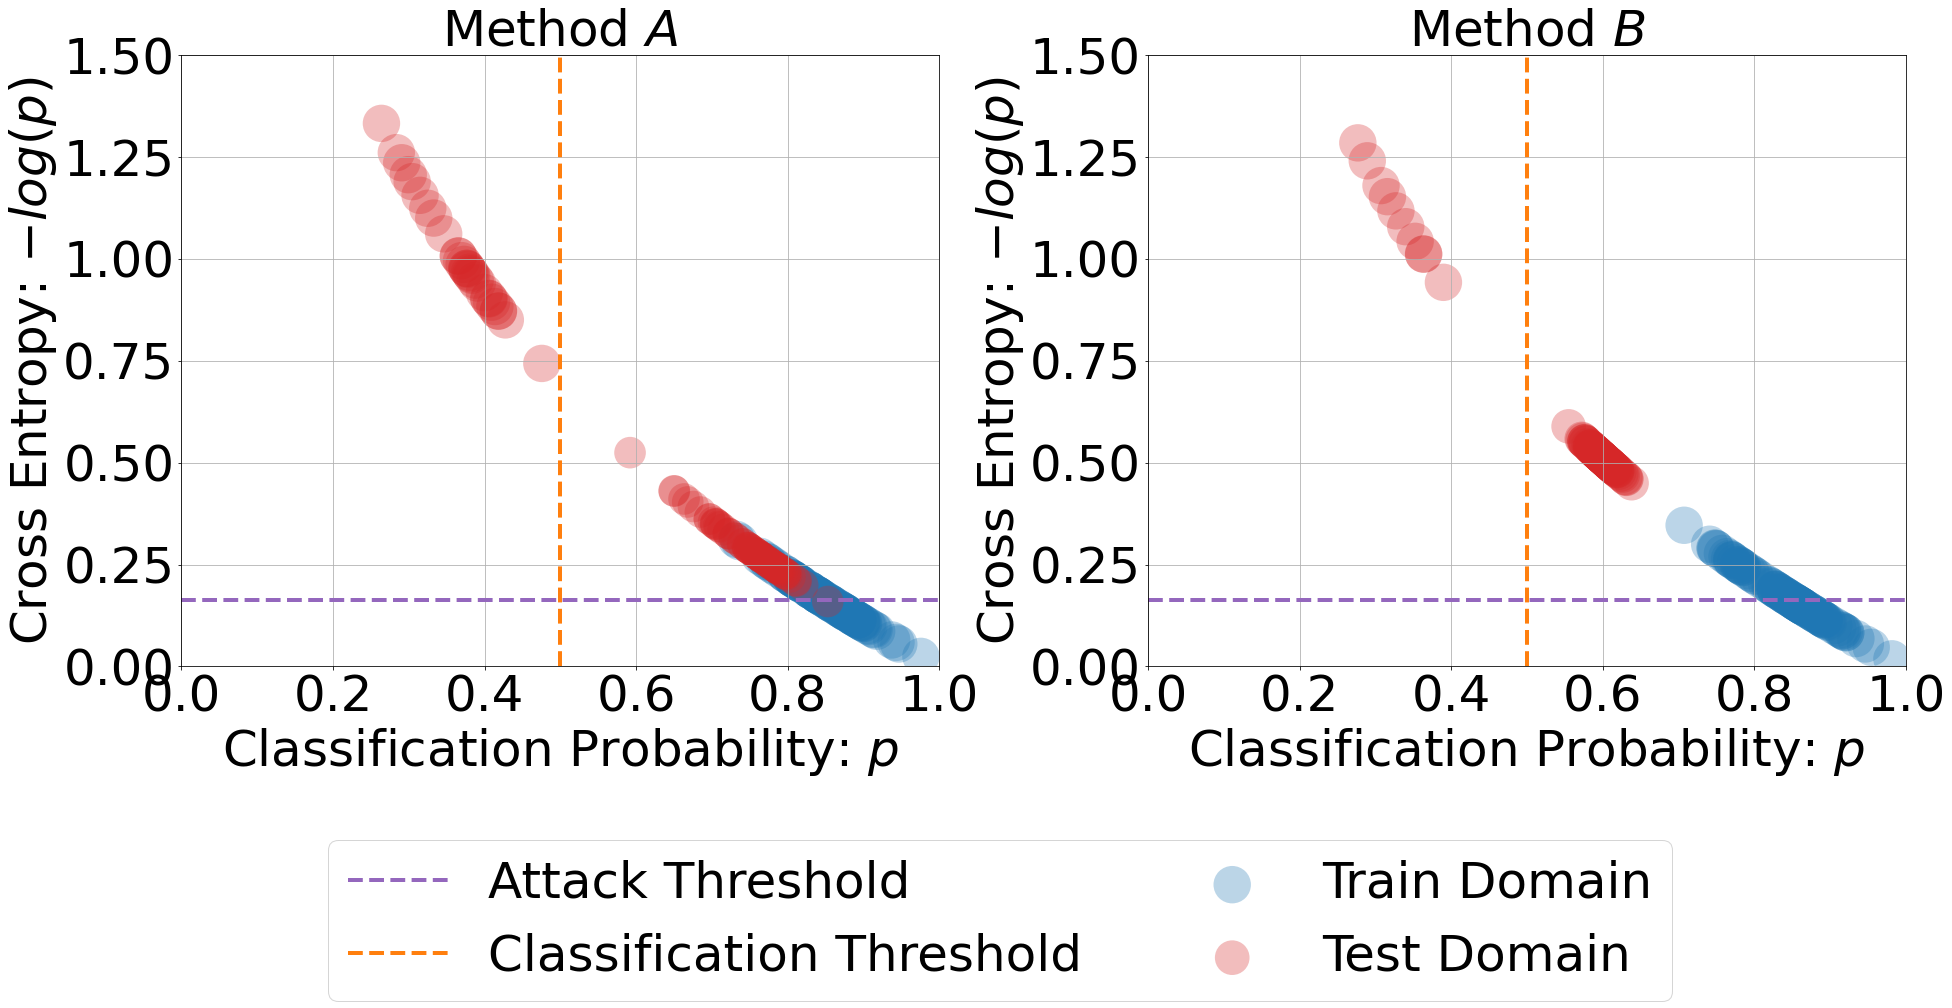

In [27]:
matplotlib.rcParams.update({'errorbar.capsize': 2})
fig, ax = plt.subplots(1, 2, figsize=(27, 11))
fontsize=50
fontsize_lgd= fontsize/1.2
marker_list = ['o', '^']
color_list= ['tab:blue', 'tab:red']

#OOD Accuracy
ax[0].tick_params(labelsize=fontsize)
# ax[0].set_xticklabels(x, rotation=25)
ax[0].set_ylabel('Cross Entropy: $-log(p)$', fontsize=fontsize)
ax[0].set_xlabel('Classification Probability: $p$', fontsize=fontsize)
ax[0].set_title('Method $A$', fontsize= fontsize)
ax[0].set(xlim=(0,1), ylim=(0,1.5))
ax[0].grid()
# ax[0].fill_between([0.60, 1.0], 0.0 , 0.50, color='grey' )

p_train= np.random.normal(0.85, 0.05, 100)
p_test= np.random.normal(0.75, 0.05, 70)
p_test_inc= np.random.normal(0.35, 0.05, 30)

ax[0].scatter( p_train, -np.log(p_train), c= color_list[0], s=200*7, label='Train Domain', alpha=0.3, edgecolors='none' )
ax[0].scatter( p_test, -np.log(p_test), c= color_list[1], s=200*5, label='Test Domain', alpha=0.3, edgecolors='none' )
ax[0].scatter( p_test_inc, -np.log(p_test_inc), c=color_list[1], s=200*7, alpha=0.3, edgecolors='none' )
ax[0].axhline(-np.log(0.85), ls='--', color='tab:purple', label='Attack Threshold', linewidth=4)
ax[0].axvline(0.5, ls='--', color='tab:orange', label='Classification Threshold', linewidth=4)
# ax[0].legend(fontsize= fontsize)

#MI Attack
ax[1].tick_params(labelsize=fontsize)
# ax[1].set_xticklabels(x, rotation=25)
ax[1].set_ylabel('Cross Entropy: $-log(p)$', fontsize=fontsize)
ax[1].set_xlabel('Classification Probability: $p$', fontsize=fontsize)
ax[1].set_title('Method $B$', fontsize= fontsize)
ax[1].set(xlim=(0,1), ylim=(0, 1.5))
ax[1].grid()

p_train= np.random.normal(0.85, 0.05, 100)
p_test= np.random.normal(0.60, 0.015, 90)
p_test_inc= np.random.normal(0.35, 0.05, 10)

ax[1].scatter( p_train, -np.log(p_train), c= color_list[0], s=200*7, label='Train Domain', alpha=0.3, edgecolors='none' )
ax[1].scatter( p_test, -np.log(p_test), c= color_list[1], s=200*6, label='Test Domain', alpha=0.3, edgecolors='none' )
ax[1].scatter( p_test_inc, -np.log(p_test_inc), c=color_list[1], s=200*7, alpha=0.3, edgecolors='none' )
ax[1].axhline(-np.log(0.85), ls='--', color='tab:purple', label='Attack Threshold', linewidth=4)
ax[1].axvline(0.5, ls='--', color='tab:orange', label='Classification Threshold', linewidth=4)
# ax[1].legend(fontsize= fontsize)

lines, labels = fig.axes[-1].get_legend_handles_labels()    
lgd= fig.legend(lines, labels, loc="lower center", bbox_to_anchor=(0.5, -0.30), fontsize=fontsize, ncol=2)
    
plt.tight_layout()
plt.savefig('../../results/counterexample.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight',  dpi=600)